# Sep 27 Assingment
## 1. Analysis Supermarket every month, calculate the maximun sales and average sales, and calculate trend.

In [86]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'pandas,'
You should consider upgrading via the 'c:\Users\I030187\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [97]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\I030187\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [87]:
import pandas as pd
# read data
df = pd.read_excel('./data/supermarket_data_clean_min.xlsx',sheet_name='Data')
# clearing data
df_del = df[df["Sales"].str.isdecimal()==False]
for idx in df_del.index:
    df.loc[idx,'Sales'] = 'delete'
df = df[df['Sales']!='delete']

df['Sales'] = df['Sales'].astype('float')
df


,Order Date,Order Date Year Month,Order Date Year,Order Date Month,Order Date Day,Ship Date,Ship Date Year,Ship Date Month,Ship Date Day,Ship Mode,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unnamed: 24,Unnamed: 25
0,1/1/2011,2011-01,2011,1,1,6/1/2011,2011,6,1,Standard Class,...,Storage,"Tenex Lockers, Blue",408.300,2.0,0.0,106.14,35.46,Medium,NaN,NaN
1,1/2/2011,2011-01,2011,1,2,7/2/2011,2011,7,2,Standard Class,...,Binders,"Acco Hole Reinforcements, Recycled",21.060,3.0,0.0,10.53,1.86,Medium,NaN,NaN
2,1/3/2011,2011-01,2011,1,3,8/3/2011,2011,8,3,Standard Class,...,Art,"BIC Markers, Easy-Erase",106.800,4.0,0.0,29.88,16.48,Low,NaN,NaN
3,1/3/2011,2011-01,2011,1,3,6/3/2011,2011,6,3,Standard Class,...,Art,"Sanford Pens, Fluorescent",37.080,3.0,0.0,10.35,3.55,High,NaN,NaN
4,1/4/2011,2011-01,2011,1,4,5/4/2011,2011,5,4,Second Class,...,Phones,"Motorola Audio Dock, with Caller ID",138.696,2.0,0.4,-25.464,20.4,Medium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,31-12-2013,2013-12,2013,12,31,7/1/2014,2014,7,1,Standard Class,...,Storage,"Tenex Box, Industrial",33.960,2.0,0.0,15.96,4.17,Low,NaN,NaN
2560,31-12-2013,2013-12,2013,12,31,2/1/2014,2014,2,1,Second Class,...,Binders,"Wilson Jones Binder, Economy",13.020,1.0,0.0,4.02,0.14,Medium,NaN,NaN
2561,31-12-2014,2014-12,2014,12,31,7/1/2015,2015,7,1,Standard Class,...,Accessories,"Enermax Numeric Keypad, Bluetooth",171.990,3.0,0.0,6.84,16.66,Medium,NaN,NaN
2562,31-12-2014,2014-12,2014,12,31,5/1/2015,2015,5,1,Second Class,...,Art,"BIC Pencil Sharpener, Fluorescent",30.270,2.0,0.5,-9.69,4.46,High,NaN,NaN


In [88]:
import numpy as np
df_max = pd.pivot_table(df,values="Sales",index="Order Date Year Month",aggfunc=np.max,fill_value=0)
df_average = pd.pivot_table(df,values="Sales",index="Order Date Year Month",aggfunc=np.average,fill_value=0)
df_pivot = df_max.join(df_average,lsuffix="Max",rsuffix="Average")
df_pivot = df_pivot.reset_index()

df_pivot

,Order Date Year Month,SalesMax,SalesAverage
0,2011-01,2571.1200,220.123488
1,2011-02,2052.5400,339.916360
2,2011-03,1619.1000,233.553984
3,2011-04,1713.0960,216.491429
4,2011-05,1272.1200,193.974212
5,2011-06,1718.1720,277.671714
6,2011-07,980.9100,156.621344
7,2011-08,1666.6560,248.966559
8,2011-09,2885.0850,290.999174
9,2011-10,1066.4460,206.455768


In [89]:
# add trend line
def trend(df,colum,date_month_colum='Order Date Year Month'):
    x_num = np.arange(len(df[date_month_colum]))

    z=np.polyfit(x_num, np.array(df[colum]), 1)
    p = np.poly1d(z)
    return p(x_num)
trend_max = trend(df_pivot,'SalesMax')
trend_average = trend(df_pivot,'SalesAverage')

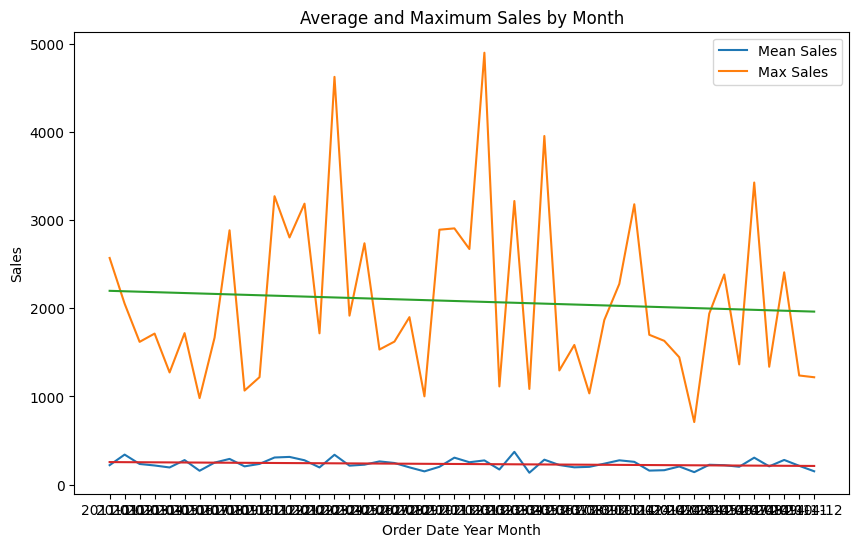

In [90]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_pivot['Order Date Year Month'], df_pivot['SalesAverage'], label='Mean Sales')
plt.plot(df_pivot['Order Date Year Month'], df_pivot['SalesMax'], label='Max Sales')
plt.plot(df_pivot['Order Date Year Month'], trend_max)
plt.plot(df_pivot['Order Date Year Month'], trend_average)
plt.legend()
plt.xlabel('Order Date Year Month')
plt.ylabel('Sales')
plt.title('Average and Maximum Sales by Month')

plt.show()

## 2. Analysis Supermarket (United States) every month, calculate the maximun sales and average sales, and calculate trend.

In [91]:
df_country_max = pd.pivot_table(df,values="Sales",columns="Country",index="Order Date Year Month",aggfunc=np.max,fill_value=0)
df_country_average = pd.pivot_table(df,values="Sales",columns="Country",index="Order Date Year Month",aggfunc=np.average,fill_value=0)
df_country_pivot = df_country_max.join(df_country_average,lsuffix="Max",rsuffix="Average")
df_country_pivot = df_country_pivot.reset_index()
df_usa_pivot = pd.DataFrame()
df_usa_pivot['Order Date Year Month'] = df_country_pivot['Order Date Year Month']
df_usa_pivot['Max'] = df_country_pivot['United StatesMax']
df_usa_pivot['Average'] = df_country_pivot['United StatesAverage']
# add trend line
trend_usa_max = trend(df_usa_pivot,'Max')
trend_usa_average = trend(df_usa_pivot,'Average')
trend_usa_max

array([ 575.52724915,  589.55858518,  603.58992121,  617.62125724,
        631.65259327,  645.6839293 ,  659.71526532,  673.74660135,
        687.77793738,  701.80927341,  715.84060944,  729.87194547,
        743.9032815 ,  757.93461753,  771.96595356,  785.99728959,
        800.02862562,  814.05996164,  828.09129767,  842.1226337 ,
        856.15396973,  870.18530576,  884.21664179,  898.24797782,
        912.27931385,  926.31064988,  940.34198591,  954.37332194,
        968.40465796,  982.43599399,  996.46733002, 1010.49866605,
       1024.53000208, 1038.56133811, 1052.59267414, 1066.62401017,
       1080.6553462 , 1094.68668223, 1108.71801826, 1122.74935428,
       1136.78069031, 1150.81202634, 1164.84336237, 1178.8746984 ,
       1192.90603443, 1206.93737046, 1220.96870649, 1235.00004252])

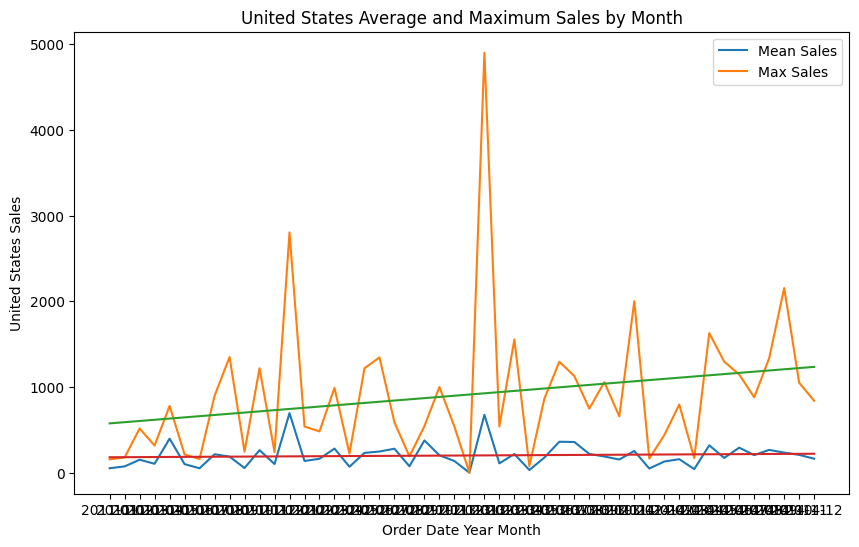

In [92]:
# Choose United States as Country and show the max and average
plt.figure(figsize=(10, 6))

plt.plot(df_usa_pivot['Order Date Year Month'], df_usa_pivot['Average'], label='Mean Sales')
plt.plot(df_usa_pivot['Order Date Year Month'], df_usa_pivot['Max'], label='Max Sales')
plt.plot(df_usa_pivot['Order Date Year Month'], trend_usa_max)
plt.plot(df_usa_pivot['Order Date Year Month'], trend_usa_average)

plt.legend()
plt.xlabel('Order Date Year Month')
plt.ylabel('United States Sales')
plt.title('United States Average and Maximum Sales by Month')
plt.show()

## Assignment 3: Choose a dimension from NBA and analyze

In [93]:
df_nba = pd.read_excel('./data/NBA_Analysis.xlsx',sheet_name='完整数据')
df_nba

,Unnamed: 0,Team,Game,Date,Year_Month,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,2014-10-29,2014-10,Away,TOR,L,102,109,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,2014-11,Home,IND,W,102,92,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,2014-11,Away,SAS,L,92,94,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,2014-11,Away,CHO,L,119,122,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,2014-11,Home,NYK,W,103,96,...,8,11,0.727,13,44,26,2,6,15,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,78119,WAS,78,2018-04-03,2018-04,Away,HOU,L,104,120,...,18,27,0.667,10,46,26,13,3,9,14
9836,79119,WAS,79,2018-04-05,2018-04,Away,CLE,L,115,119,...,22,28,0.786,5,35,26,10,3,16,14
9837,80119,WAS,80,2018-04-06,2018-04,Home,ATL,L,97,103,...,16,23,0.696,7,50,24,5,5,18,22
9838,81124,WAS,81,2018-04-10,2018-04,Home,BOS,W,113,101,...,22,27,0.815,13,44,22,14,1,16,18


In [94]:
df_nba_pivot = pd.pivot_table(df_nba,values=['X3PointShots','X3PointShotsAttempted'],index=['Team','Year_Month'],aggfunc=np.sum,fill_value=0)
df_nba_pivot['X3PointShots Rate'] = df_nba_pivot['X3PointShots'] / df_nba_pivot['X3PointShotsAttempted']
df_nba_pivot

X3PointShots  X3PointShotsAttempted  X3PointShots Rate
Team Year_Month                                                        
ATL  2014-10               13                     22           0.590909
     2014-11              118                    337           0.350148
     2014-12              157                    415           0.378313
     2015-01              184                    443           0.415350
     2015-02              116                    313           0.370607
...                       ...                    ...                ...
WAS  2017-12              159                    434           0.366359
     2018-01              134                    338           0.396450
     2018-02              114                    326           0.349693
     2018-03              141                    360           0.391667
     2018-04               63                    165           0.381818

[840 rows x 3 columns]

In [95]:
df_nba_was_pivot = df_nba_pivot.loc['WAS',:]
df_nba_was_pivot = df_nba_was_pivot.reset_index()
trend_was_pivot = trend(df_nba_was_pivot,'X3PointShots Rate','Year_Month')
trend_was_pivot

trend = [i*100 for i in trend_was_pivot]
value = [i*100 for i in df_nba_was_pivot['X3PointShots Rate']]

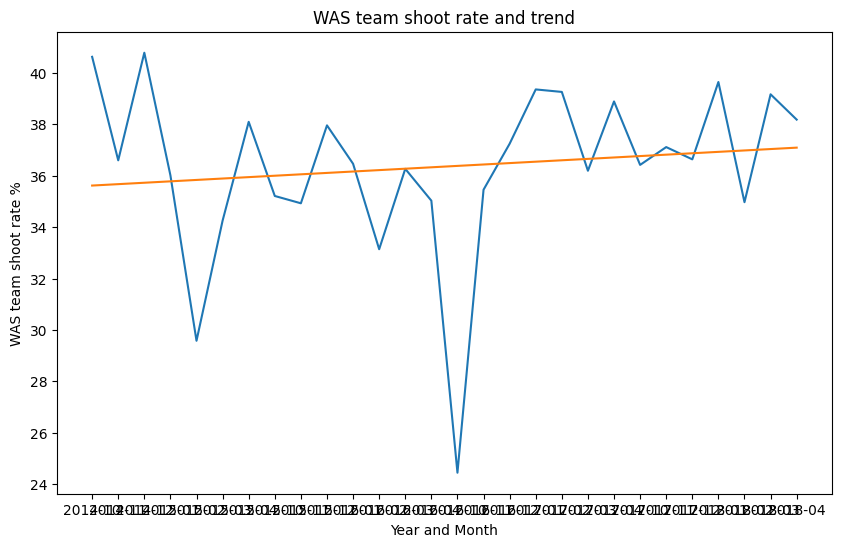

In [96]:
# Choose WAS as team and show the 3分球命中率和趋势
plt.figure(figsize=(10, 6))


plt.plot(df_nba_was_pivot['Year_Month'], value)
plt.plot(df_nba_was_pivot['Year_Month'], trend)

plt.xlabel('Year and Month')
plt.ylabel('WAS team shoot rate %')
plt.title('WAS team shoot rate and trend')

plt.show()